In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath
import networkx as nx

from metal.label_model import LabelModel
from metal.label_model.graph_utils import JunctionTree
from synthetic.generate_spa import (
    ChainDependencies,
    TreeDependencies,
    ClusterDependencies,
    DataGenerator
)
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


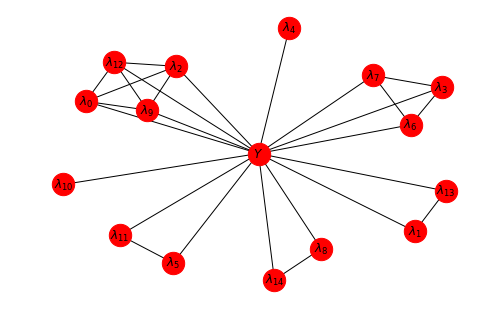

In [2]:
M = 15
N_CLUSTERS = 10
deps_graph = ClusterDependencies(M, N_CLUSTERS)
# deps_graph = ChainDependencies(M)
deps_graph.draw()

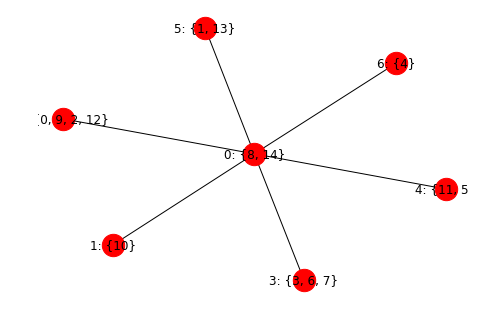

In [3]:
N = 1000 # Not used yet...
K = 2
HIGHER_ORDER_CLIQUES = True

data = DataGenerator(
    N,
    M,
    k=K,
    abstains=False,
    deps_graph=deps_graph,
    higher_order_cliques=HIGHER_ORDER_CLIQUES
)
data.jt.draw()

In [4]:
%time sigma_O = data.get_sigma_O()

CPU times: user 7.5 s, sys: 48.6 ms, total: 7.55 s
Wall time: 7.58 s


In [5]:
np.linalg.cond(sigma_O)

640.1313056273752

In [6]:
E_O = np.array([data.P_marginal(v) for i, v in data.jt.iter_observed()])

In [7]:
class_balance = data.get_class_balance()
class_balance

array([0.78912587, 0.21087413])

In [8]:
lm = LabelModel(k=2)

lm.train(
    sigma_O=sigma_O,
    E_O=E_O,
    junction_tree=data.jt,
    class_balance=class_balance,
    lr=0.001,
    n_epochs=10000,
    print_every=1000
)

Estimating Z...
[E:0]	Train Loss: 679.01251221
[E:1000]	Train Loss: 0.00000000
[E:2000]	Train Loss: 0.00000000
[E:3000]	Train Loss: 0.00000000
[E:4000]	Train Loss: 0.00000000
[E:5000]	Train Loss: 0.00000000
[E:6000]	Train Loss: 0.00000000
[E:7000]	Train Loss: 0.00000000
[E:8000]	Train Loss: 0.00000000
[E:9000]	Train Loss: 0.00000000
[E:9999]	Train Loss: 0.00000000
Finished Training


In [9]:
mu_est = lm.get_mu()
mu = data.get_mu()
np.hstack([mu_est, mu])

array([[0.11636407, 0.1163641 ],
       [0.13187349, 0.13187349],
       [0.158118  , 0.15811803],
       [0.11677528, 0.11677529],
       [0.10629878, 0.10629878],
       [0.1186057 , 0.11860569],
       [0.10280317, 0.10280317],
       [0.13202642, 0.13202642],
       [0.15888918, 0.15888914],
       [0.13614931, 0.13614935],
       [0.16183545, 0.16183546],
       [0.13723231, 0.13723231],
       [0.13375477, 0.1337548 ],
       [0.10476   , 0.10476   ],
       [0.1256796 , 0.12567958],
       [0.09469691, 0.09469687],
       [0.07512961, 0.07512963],
       [0.08725231, 0.08725234],
       [0.07380825, 0.07380828],
       [0.10208773, 0.10208776],
       [0.08635778, 0.08635781],
       [0.10029224, 0.10029227],
       [0.05633382, 0.05633384],
       [0.04765376, 0.04765378],
       [0.05534304, 0.05534306],
       [0.06475295, 0.06475297],
       [0.03573183, 0.03573184],
       [0.05692908, 0.05692908],
       [0.07311196, 0.07311197],
       [0.06436415, 0.06436415],
       [0.

In [10]:
np.mean(np.abs(mu - mu_est))

1.6880082250331385e-08